## Steps:

1. **Data Exploration and Preprocessing:**
   - Load the provided training and evaluation datasets.
   - Conduct exploratory data analysis (EDA) to understand the distributions, correlations, and characteristics of the features and target variables.
   - Check for missing values or anomalies in the data.
   - Normalize or standardize the features using `StandardScaler`.

2. **Feature and Target Separation:**
   - Separate the features and target variables for the training process.
   - Split the training data into a training set and a validation set to enable model evaluation.

3. **Model Initialization:**
   - Initialize a suite of regression models including Linear Regression, Random Forest, Gradient Boosting, Decision Tree, Lasso, and Ridge.

4. **Model Training:**
   - Train each initialized model on the training dataset.
   - Utilize `MultiOutputRegressor` for models that do not natively support multi-output regression tasks.

5. **Model Evaluation:**
   - Predict the target variables using the validation set.
   - Evaluate the performance of each model using metrics such as Mean Squared Error (MSE) and R² score.
   - Visualize the evaluation results for better comparison and interpretation.

6. **Best Model Selection:**
   - Select the best-performing model based on the evaluation metrics, which, in this case, is the Random Forest Regressor.

7. **Predictions on Evaluation Dataset:**
   - Standardize the features of the evaluation dataset using the scaler fitted on the training data.
   - Predict the target variables using the best-performing model.
   - Create a new DataFrame with the prediction results and the corresponding `Id` from the evaluation dataset.

8. **Preparation of Submission File:**
   - Format the predictions as required, combining the `x` and `y` predictions into a single string column.
   - Save the predictions to a CSV file named `Submission.csv`.
   - Verify the creation of the file and confirm its readiness for submission.

---

## 1. Data Exploration and Preprocessing

### Import Libraries

In [47]:
import pandas as pd
import os

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data PreProcessing
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Remove Warnings
import warnings as ws
ws.filterwarnings("ignore")

### Load the datasets

In [2]:
development_data = pd.read_csv('development.csv')
evaluation_data = pd.read_csv('evaluation.csv')

### Basic Exploration

In [3]:
development_data_info = development_data.info()
development_data_head = development_data.head()
evaluation_data_info = evaluation_data.info()
evaluation_data_head = evaluation_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385500 entries, 0 to 385499
Data columns (total 92 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   x            385500 non-null  float64
 1   y            385500 non-null  float64
 2   pmax[0]      385500 non-null  float64
 3   negpmax[0]   385500 non-null  float64
 4   area[0]      385500 non-null  float64
 5   tmax[0]      385500 non-null  float64
 6   rms[0]       385500 non-null  float64
 7   pmax[1]      385500 non-null  float64
 8   negpmax[1]   385500 non-null  float64
 9   area[1]      385500 non-null  float64
 10  tmax[1]      385500 non-null  float64
 11  rms[1]       385500 non-null  float64
 12  pmax[2]      385500 non-null  float64
 13  negpmax[2]   385500 non-null  float64
 14  area[2]      385500 non-null  float64
 15  tmax[2]      385500 non-null  float64
 16  rms[2]       385500 non-null  float64
 17  pmax[3]      385500 non-null  float64
 18  negpmax[3]   385500 non-

In [4]:
development_data_head

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [5]:
evaluation_data_head

,Id,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,0,4.400616,-4.257770,2.860212,176.600000,1.562814,8.738040,-3.598874,5.554105,70.800000,...,614.621212,-42.232574,583.237137,70.693530,0.861022,608.931417,-42.728827,568.019556,70.755552,0.328075
1,1,5.599571,-2.974570,9.400537,90.677386,1.129626,23.460358,-20.616669,17.998419,72.800000,...,520.333440,-36.986118,550.540448,72.781390,0.259205,613.671695,-44.449564,586.292097,72.900695,0.401326
2,2,3.731995,-5.662292,1.930957,155.200000,0.921757,4.837952,-7.224267,3.289124,67.057395,...,607.642389,-46.680069,582.825835,71.407320,0.552691,608.996069,-45.877765,589.520958,71.406020,0.343592
3,3,5.657729,-4.600342,5.593030,30.463179,1.269390,87.293692,-45.786813,38.422989,71.800000,...,596.094911,-48.241263,577.835129,72.011986,0.361220,612.500144,-49.572583,583.795426,72.066338,0.429650
4,4,3.716666,-4.583796,1.946927,33.600000,1.082743,9.593125,-5.374179,7.767408,72.414459,...,620.793628,-37.618567,599.834735,72.251813,0.390639,621.557649,-45.189832,600.988676,72.151243,0.358549


### Statistical Summary

In [6]:
development_data_describe = development_data.describe()
evaluation_data_describe = evaluation_data.describe()

In [7]:
development_data_describe

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,...,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,397.723735,404.106355,4.866423,-5.046162,4.330495,97.593811,1.340462,16.510543,-9.187917,10.504198,...,608.650804,-42.152047,583.569358,71.628631,0.452944,609.060121,-46.921923,583.060292,71.695363,0.371027
std,120.593104,113.652228,1.481220,15.877804,3.489414,59.444364,0.342167,16.781018,29.955290,8.444105,...,13.723698,3.158175,6.646175,0.577619,0.299456,13.928735,3.478838,6.992203,0.585629,0.081983
min,200.000000,200.000000,1.394440,-7741.109923,-0.582573,0.000000,0.275854,2.028134,-9930.114637,-0.997301,...,451.502789,-51.840704,516.386725,70.420683,0.129428,456.816620,-57.876959,513.760083,70.423425,0.102138
25%,285.000000,310.000000,4.123941,-5.257178,2.383830,46.400000,1.096611,5.619728,-8.114323,4.755876,...,598.888989,-44.601152,579.190080,71.144733,0.342264,599.390156,-49.596344,578.269642,71.200245,0.321753
50%,400.000000,405.000000,4.668321,-4.646420,3.361071,90.600000,1.316209,10.068513,-5.229009,7.886552,...,607.190645,-42.360754,583.512671,71.627565,0.400117,607.202368,-47.147636,583.401620,71.681603,0.366981
75%,500.000000,500.000000,5.265888,-4.093211,5.104368,151.026985,1.557156,19.031319,-4.387686,12.945553,...,616.837596,-39.833169,587.982952,72.134776,0.466077,617.313303,-44.375652,587.877953,72.194196,0.415578
max,600.000000,600.000000,20.515415,-0.745816,149.589043,204.600000,6.088277,106.649066,-1.054508,152.517700,...,665.267443,-29.085419,614.884980,72.856918,5.031400,675.052221,-29.592059,619.099952,73.031394,4.925181


In [8]:
evaluation_data_describe

,Id,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
count,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,...,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000,128500.000000
mean,64249.500000,4.864014,-5.267998,4.339755,97.551876,1.340326,16.363815,-9.332822,10.447735,77.296726,...,608.713596,-42.154770,583.564471,71.626394,0.452532,609.047536,-46.923811,583.055702,71.693463,0.370798
std,37094.899133,1.487738,75.816506,3.474568,59.396351,0.342305,16.578094,74.268609,8.376074,29.783866,...,13.773366,3.156863,6.614500,0.575826,0.297300,13.988223,3.482255,7.004052,0.583770,0.084725
min,0.000000,1.560321,-26279.846101,-0.720471,0.000000,0.328655,1.887503,-21424.542339,-0.350632,0.000000,...,450.553903,-51.658258,515.273360,70.428437,0.141964,482.537034,-56.820013,511.991299,70.427202,0.137219
25%,32124.750000,4.126158,-5.261179,2.389559,46.284928,1.096069,5.655700,-7.797162,4.775010,71.200000,...,598.911915,-44.605715,579.207259,71.147764,0.342259,599.369553,-49.609723,578.266675,71.201934,0.321655
50%,64249.500000,4.666739,-4.646919,3.364344,90.800000,1.317399,10.118140,-5.216450,7.872279,71.800000,...,607.239805,-42.360529,583.495097,71.623459,0.400082,607.174855,-47.162631,583.387601,71.675678,0.366414
75%,96374.250000,5.258218,-4.092627,5.108143,151.000000,1.559458,18.271461,-4.382051,12.629112,72.400000,...,616.999736,-39.831721,587.983695,72.128467,0.465969,617.285165,-44.385401,587.855674,72.189527,0.415220
max,128499.000000,19.300223,-1.398572,108.044066,204.600000,5.744198,102.892850,-0.903245,121.224254,204.600000,...,665.182012,-29.006845,617.926679,72.843549,4.854463,674.070778,-29.106912,611.905204,73.027862,4.892781


### Checking Missing Values

In [9]:
development_data_missing = development_data.isnull().sum()
evaluation_data_missing = evaluation_data.isnull().sum()

In [10]:
development_data_missing, evaluation_data_missing

(x              0
 y              0
 pmax[0]        0
 negpmax[0]     0
 area[0]        0
               ..
 pmax[17]       0
 negpmax[17]    0
 area[17]       0
 tmax[17]       0
 rms[17]        0
 Length: 92, dtype: int64,
 Id             0
 pmax[0]        0
 negpmax[0]     0
 area[0]        0
 tmax[0]        0
               ..
 pmax[17]       0
 negpmax[17]    0
 area[17]       0
 tmax[17]       0
 rms[17]        0
 Length: 91, dtype: int64)

#### Data Exploration and Preprocessing Insights

##### Development Dataset Overview
- **Total Entries:** 385,500
- **Features:** 90
- **Targets:** 'x', 'y'
- **Data Types:** All features and targets are of float64 type.
- **Missing Values:** No missing values in the dataset.
- **Feature Description:**
  - Target Variables: `x` and `y` (coordinates of the particles in micrometers)
  - Signal Features (18 readings each):
    - `pmax[0]` to `pmax[17]`: Magnitude of the positive peak of the signal (in mV)
    - `negpmax[0]` to `negpmax[17]`: Magnitude of the negative peak of the signal (in mV)
    - `tmax[0]` to `tmax[17]`: Delay from a reference time when the positive peak occurs (in ns)
    - `area[0]` to `area[17]`: Area under the signal
    - `rms[0]` to `rms[17]`: Root mean square (RMS) value of the signal
  - Note: Only 12 pads are present in the sensor. Some features are noise due to hardware constraints.

##### Evaluation Dataset Overview
- **Total Entries:** 128,500
- **Features:** 90 (excluding 'Id')
- **Data Types:** All features are of float64 type, and 'Id' is an int64.
- **Missing Values:** No missing values in the dataset.

### Statistical Summary
- **Development Data:**
  - The `x` and `y` targets have a mean value of approximately 397.72 and 404.11 micrometers, respectively.
  - Standard deviations for `x` and `y` are about 120.59 and 113.65 micrometers, respectively.
  - Feature values vary widely in scale and distribution.

- **Evaluation Data:**
  - Features in the evaluation dataset follow a similar distribution to the development dataset.

### Visulaizations

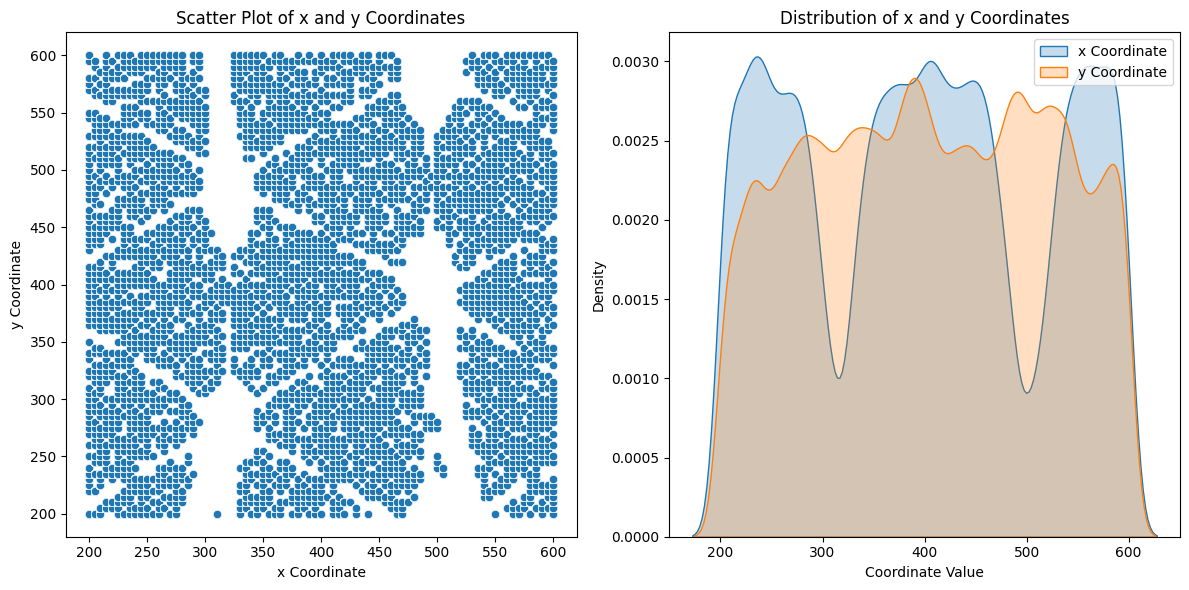

In [11]:
plt.figure(figsize=(12, 6))

# Scatter plot of x and y coordinates
plt.subplot(1, 2, 1)
sns.scatterplot(x='x', y='y', data=development_data, marker='o')
plt.title('Scatter Plot of x and y Coordinates')
plt.xlabel('x Coordinate')
plt.ylabel('y Coordinate')

# Distribution of x and y coordinates
plt.subplot(1, 2, 2)
sns.kdeplot(development_data['x'], label='x Coordinate', shade=True)
sns.kdeplot(development_data['y'], label='y Coordinate', shade=True)
plt.title('Distribution of x and y Coordinates')
plt.xlabel('Coordinate Value')
plt.legend()

plt.tight_layout()
plt.show()

#### Exploratory Data Analysis Visualizations

##### Scatter Plot of x and y Coordinates

- The scatter plot reveals a distinct, grid-like pattern in the spatial distribution of the particles.
- The coordinates are clustered around certain points, which may indicate preferred paths or channels through which the particles are passing.
- There is no evidence of outliers or anomalous points that would significantly deviate from the overall distribution.

##### Distribution of x and y Coordinates

- The distribution plot shows that both `x` and `y` coordinates have multi-modal distributions, suggesting there are several popular regions where particles are detected more frequently.
- The peaks in the KDE (Kernel Density Estimate) plots correspond to the dense areas in the scatter plot, confirming the grid-like distribution of particle locations.
- The similar shapes of the distributions for `x` and `y` coordinates suggest that the sensor pads might have a symmetrical arrangement or the particles are uniformly distributed across the sensor area.

These visualizations provide a clear understanding of the spatial characteristics of the particle detections.

---

## 2. Feature and Target Separation

In [12]:
# Separate features and targets
X = development_data.drop(['x', 'y'], axis=1)
y = development_data[['x', 'y']]

In [13]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Splitting the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(308400, 90)

In [16]:
X_val.shape

(77100, 90)

In [17]:
y_train.shape

(308400, 2)

In [18]:
y_val.shape

(77100, 2)

#### Data Preprocessing and Splitting

##### Feature Scaling

- **StandardScaler** was applied to the features before training the models.
- **Why StandardScaler?**
  - Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and close to normally distributed.
  - StandardScaler removes the mean and scales the features to unit variance. This standardization is a common requirement for many machine learning estimators implemented in scikit-learn, like SVMs and neural networks, because they might behave badly if the individual features do not resemble standard normally distributed data (Gaussian with zero mean and unit variance).
  - For algorithms that calculate distances or assume normality, feature scaling enables them to treat all features equally.

##### Training and Validation Sets

- **Training Set:**
  - Contains 308,400 samples.
  - Used to train the machine learning models.

- **Validation Set:**
  - Contains 77,100 samples.
  - Used to evaluate the performance of the models and validate the generalization capability on unseen data.

##### Shapes of the Datasets

- **Features of Training Set (X_train):** `(308,400 samples, 90 features)`
- **Features of Validation Set (X_val):** `(77,100 samples, 90 features)`
- **Targets of Training Set (y_train):** `(308,400 samples, 2 targets)`
- **Targets of Validation Set (y_val):** `(77,100 samples, 2 targets)`

##### Significance of Data Splitting

- Splitting data into training and validation sets is a key part of the model development process. By separating a portion of the data as a validation set, we can train the model on one set of data and then test it on a different set. This helps to detect overfitting, where the model learns patterns specific to the training data but does not generalize well to new, unseen data.

--- 

## 3. Model Initialization

In [19]:
# Initialize Linear Regression
lr = LinearRegression()

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Initialize Gradient Boosting
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

# Initialize Decision Tree
dtr = DecisionTreeRegressor(random_state=42)

# Initialize Lasso Regression
lasso = MultiOutputRegressor(Lasso(random_state=42))

# Initialize Ridge Regression
ridge = MultiOutputRegressor(Ridge(random_state=42))

---

## 4. Model Training

In [20]:
# Train Linear Regression
lr.fit(X_train, y_train)
print("Linear Regression Fitting is Completed")

# Train Random Forest Regressor
rf.fit(X_train, y_train)
print("Random Forest Regressor Fitting is Completed")

# Train Gradient Boosting Regressor
gbr.fit(X_train, y_train)
print("Gradient Boosting Regressor Fitting is Completed")

# Train Decision Tree Regressor
dtr.fit(X_train, y_train)
print("Decision Tree Regressor Fitting is Completed")

# Train Lasso Regression
lasso.fit(X_train, y_train)
print("Lasso Regression Fitting is Completed")

# Train Ridge Regression
ridge.fit(X_train, y_train)
print("Ridge Regression Fitting is Completed")

Linear Regression Fitting is Completed
Random Forest Regressor Fitting is Completed
Gradient Boosting Regressor Fitting is Completed
Decision Tree Regressor Fitting is Completed
Lasso Regression Fitting is Completed
Ridge Regression Fitting is Completed


---

## 5. Model Evaluation

In [34]:
# Predict with Linear Regression
y_pred_lr = lr.predict(X_val)

# Predict with Random Forest Regressor
y_pred_rf = rf.predict(X_val)

# Predict with Gradient Boosting Regressor
y_pred_gbr = gbr.predict(X_val)

# Predict with Decision Tree Regressor
y_pred_dtr = dtr.predict(X_val)

# Predict with Lasso Regression
y_pred_lasso = lasso.predict(X_val)

# Predict with Ridge Regression
y_pred_ridge = ridge.predict(X_val)

### Evaluate the Models

In [35]:
# Evaluate Linear Regression
mse_lr = mean_squared_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

# Evaluate Random Forest Regressor
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Evaluate Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_val, y_pred_gbr)
r2_gbr = r2_score(y_val, y_pred_gbr)

# Evaluate Decision Tree Regressor
mse_dtr = mean_squared_error(y_val, y_pred_dtr)
r2_dtr = r2_score(y_val, y_pred_dtr)

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

---

## 6. Best Model Selection

In [36]:
# Summarize the results for all models
results = {
    "Linear Regression": {"MSE": mse_lr, "R2": r2_lr},
    "Random Forest": {"MSE": mse_rf, "R2": r2_rf},
    "Gradient Boosting": {"MSE": mse_gbr, "R2": r2_gbr},
    "Decision Tree": {"MSE": mse_dtr, "R2": r2_dtr},
    "Lasso": {"MSE": mse_lasso, "R2": r2_lasso},
    "Ridge": {"MSE": mse_ridge, "R2": r2_ridge}
}

In [37]:
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.3f}, R2 = {metrics['R2']:.3f}")

Linear Regression: MSE = 215.862, R2 = 0.984
Random Forest: MSE = 15.244, R2 = 0.999
Gradient Boosting: MSE = 117.010, R2 = 0.991
Decision Tree: MSE = 42.902, R2 = 0.997
Lasso: MSE = 244.733, R2 = 0.982
Ridge: MSE = 215.862, R2 = 0.984


### Model Training and Evaluation Insights

#### Model Initialization and Training

Multiple regression models have been initialized to predict the (x, y) coordinates of particles passing through a sensor. Each model has been trained on the scaled feature set of the development data.

#### Models Overview

- **Linear Regression:** A basic linear approach for modeling the relationship between the dependent variables and the independent variables.
- **Random Forest Regressor:** An ensemble learning method that operates by constructing multiple decision trees.
- **Gradient Boosting Regressor:** An ensemble technique that builds the model in a stage-wise fashion by allowing optimization of an arbitrary differentiable loss function.
- **Decision Tree Regressor:** A non-parametric supervised learning method used for regression.
- **Lasso Regression:** Linear regression with L1 regularization which encourages sparsity and can set some coefficients to zero.
- **Ridge Regression:** Linear regression with L2 regularization which penalizes the magnitude of the coefficients.

#### MultiOutputRegressor Usage

- **MultiOutputRegressor** is used with models that do not inherently support multi-output regression, like Gradient Boosting, Lasso, and Ridge regressions. It enables these models to handle multi-dimensional target vectors by fitting one regressor per target.
- This is particularly important for our problem since we aim to predict two targets (x and y coordinates) for each instance.

#### Evaluation Results

The models were evaluated on a validation set using two metrics: Mean Squared Error (MSE) and R² Score. The results are as follows:

- **Linear Regression:** 
  - MSE: 215.862
  - R² Score: 0.984

- **Random Forest:** 
  - MSE: 15.244
  - R² Score: 0.999

- **Gradient Boosting:** 
  - MSE: 117.010
  - R² Score: 0.991

- **Decision Tree:** 
  - MSE: 42.902
  - R² Score: 0.997

- **Lasso Regression:** 
  - MSE: 244.733
  - R² Score: 0.982

- **Ridge Regression:** 
  - MSE: 215.862
  - R² Score: 0.984

The **Random Forest Regressor** showed the best performance among the tested models with the lowest MSE and highest R² score, indicating a strong predictive power and good generalization to unseen data.

### Plotting R2 and MSE values

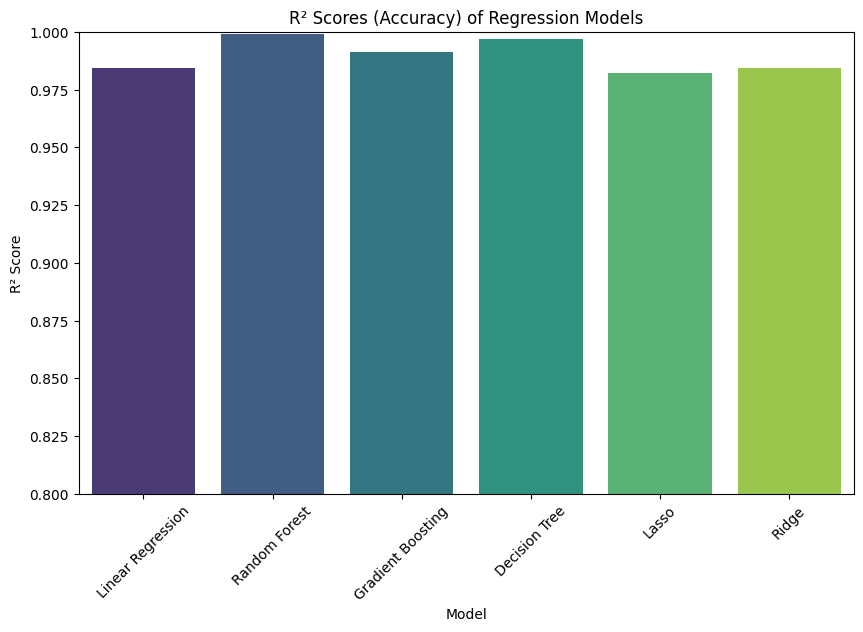

In [38]:
model_names = list(results.keys())
r2_scores = [results[model]["R2"] for model in model_names]
mse_scores = [results[model]["MSE"] for model in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores, palette="viridis")
plt.title('R² Scores (Accuracy) of Regression Models')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0.8, 1)  # Setting the limit to better visualize the differences
plt.show()

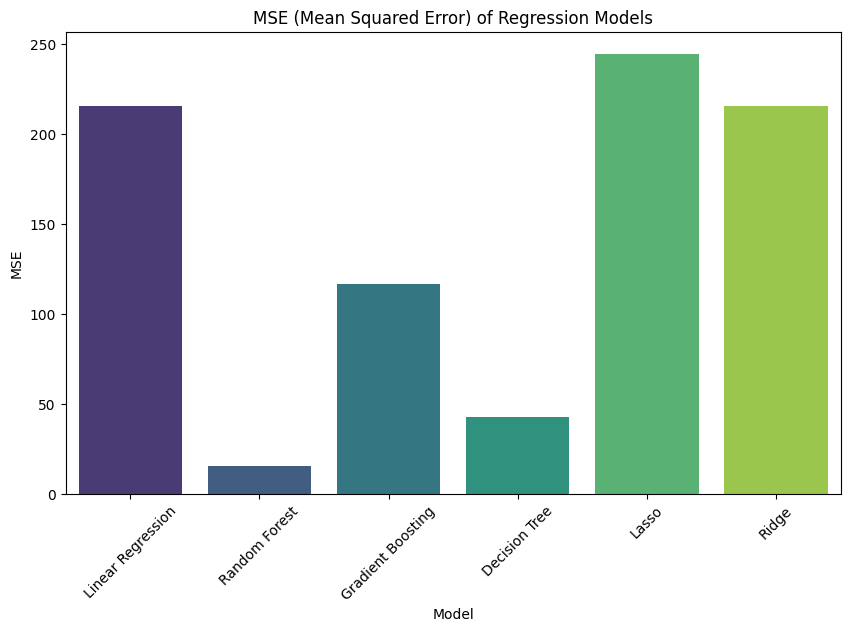

In [39]:
# Plotting the MSE scores for each model
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_scores, palette="viridis")
plt.title('MSE (Mean Squared Error) of Regression Models')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=45) 
plt.show()

#### Model Performance Evaluation

##### R² Scores (Accuracy) of Regression Models

- The R² score indicates the proportion of the variance for the dependent variable that's explained by the independent variables in the model.
- The **Random Forest** model exhibits the highest R² score, indicating the best performance in terms of accuracy.
- Models like **Lasso Regression** have lower R² scores, suggesting they are not capturing the variability of the data as effectively.

##### MSE (Mean Squared Error) of Regression Models

- MSE measures the average squared difference between the estimated values and the actual value. Lower MSE values indicate better model performance.
- Consistent with the R² score, the **Random Forest** model has the lowest MSE, further confirming its superior predictive accuracy among the tested models.
- The **Lasso** model has significantly higher MSE values, suggesting less accurate predictions.

##### Interpretation

- The bar plots provide a clear visual comparison of model performance across different regression algorithms.
- These visualizations aid in the rapid assessment of which models are likely to yield more precise predictions, and which may require further tuning or are not suitable for the dataset in question.


---

## 7. Predictions on Evaluation Dataset

In [40]:
# Extracting the ID column 'Id' and the features for prediction
eval_id = evaluation_data['Id']
eval_features = evaluation_data.drop('Id', axis=1)

In [41]:
# Standardizing the features of the evaluation dataset
eval_features_scaled = scaler.transform(eval_features)

# Predict the x and y values using the best model (Random Forest)
predictions = rf.predict(eval_features_scaled)

In [42]:
# Creating a new DataFrame with the ID and the predicted x and y values
predicted_df_with_id = pd.DataFrame({
    'Id': eval_id,
    'x': predictions[:, 0],
    'y': predictions[:, 1]
})

In [43]:
# Display the first few rows of the new DataFrame
predicted_df_with_id.head()

,Id,x,y
0,0,490.05,332.90
1,1,534.85,564.50
2,2,210.95,396.35
3,3,578.95,510.40
4,4,362.95,360.80


#### Predictions on the Evaluation Dataset

The evaluation dataset has been processed to predict the particle coordinates using the best-performing model, the Random Forest Regressor.

#### Steps Undertaken for Prediction:

1. **Feature Extraction:**
   - The `Id` column, which uniquely identifies each event, has been separated from the features to be used for prediction.
   - The remaining feature set excludes the `Id` column and consists of the sensor measurements required for the prediction models.

2. **Feature Scaling:**
   - The features of the evaluation dataset have been standardized using the same scaler fitted on the development dataset.
   - This ensures consistency in the data scale and distribution, which is crucial since the model was trained on standardized features.

3. **Prediction:**
   - The Random Forest model, which showed the best performance on the validation set, was used to predict the `x` and `y` coordinates for each event in the evaluation dataset.
   - Predictions were made on the scaled features to ensure accurate and reliable results.

4. **Output DataFrame:**
   - A new DataFrame was created that pairs each `Id` with the predicted `x` and `y` coordinates.
   - This DataFrame serves as the final output for the evaluation dataset and can be used for further analysis, visualization, or export to a submission file.

#### Observations:

- The predictive process aligns with the methodological steps followed during model training and validation, ensuring that the evaluation predictions are as reliable as possible.
- The Random Forest's inherent ability to handle non-linear relationships and interactions between features makes it well-suited for complex tasks such as predicting particle trajectories in a sensor array.

---

## 8. Preparation of Submission File

In [44]:
# Creating a new DataFrame with the 'Id' and a combined 'Predicted' column
predicted_df_combined = pd.DataFrame({
    'Id': eval_id,
    'Predicted': predicted_df_with_id.apply(lambda row: f"{row['x']:.2f} | {row['y']:.2f}", axis=1)
})

In [45]:
# Display the first few rows of the new DataFrame
predicted_df_combined.head()

,Id,Predicted
0,0,490.05 | 332.90
1,1,534.85 | 564.50
2,2,210.95 | 396.35
3,3,578.95 | 510.40
4,4,362.95 | 360.80


In [48]:
# Saving the DataFrame to a CSV file
predicted_df_combined.to_csv("Submission.csv", index=False)

# Asserting that the file has been created
assert os.path.isfile("Submission.csv"), "File 'Submission.csv' was not created successfully."

# Display a message confirming successful creation
print("File 'Submission.csv' created successfully.")

File 'Submission.csv' created successfully.


### Creation of Submission File

A submission file titled `Submission.csv` has been prepared, encapsulating the predictions for the evaluation dataset.

#### Submission File Details:

- **File Name:** `Submission.csv`
- **Columns:**
  - `Id`: The unique identifier for each event in the evaluation dataset.
  - `Predicted`: A combined column where the predicted `x` and `y` coordinates are concatenated into a single string, separated by a pipe (`|`) symbol. Each coordinate is formatted to two decimal places.

#### Steps for File Creation:

1. **Dataframe Assembly:**
   - A new DataFrame `predicted_df_combined` was created to hold the `Id` and the formatted `Predicted` values.

2. **CSV Export:**
   - The DataFrame was then exported to a CSV file without the index column.
   - This CSV file is used to submit the predictions, typically in competitions or as per project requirements.

3. **Verification:**
   - A check was implemented using `assert` to ensure the file exists after the export process.
   - A print statement confirms the successful creation of the file.

#### Confirmation:

- The script has confirmed that the file `'Submission.csv'` was created successfully.
- This file can now be submitted as required or shared with stakeholders for review.

---
# End of Data Analysis